# Car Accidents in California: Data Visualization

### Project Goal:

*California is known for its terrible traffic almost as much as it is known for its beautiful weather. What counties or areas contribute most to the traffic problem? What roads have the highest frequency of crashes? When do most crashes occur?*

### Results:
> - **County with the highest crash rate by population:** *Alameda County*
> - **Counties with highest frequency of severe crashes:** *Los Angeles / Sacremento*
> - **Roads with the highest frequency of severe crashes:** *I-5N, I-10E, I-405 N*
> - **Most common times of crashes:** *7AM and 4PM (rush hour)*
> - **Seasons with the highest / lowest frequency of crashes:** *Winter / Fall*

In [109]:
#Imported Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes 
import numpy as np


#Setting default options for Data Visualization
pd.options.display.max_columns = 999
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
plt.rcParams['font.size']=12
sns.set_style('darkgrid')

# Data Setup / Cleaning

> The data comes from [Kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents) and contains records of 3.5 million car crashes in the United States. The data will be filtered to only include data in California, and transformed into a GeoPandas dataframe to allow for plotting on shapefiles. 

In [110]:
df = pd.read_csv('us_accidents.csv')
ca = df[df['State'] == 'CA']

# Opening California shapefile. This is used for plotting x/y points on a graph.
ca_geo = gpd.read_file('california/tl_2016_06_cousub.shp')
geometry  = [Point(xy) for xy in zip( ca['Start_Lng'], ca['Start_Lat'])]

ca = gpd.GeoDataFrame(ca, crs = 'EPSG:4326', geometry = geometry)
ca['x'] = ca['geometry'].apply(lambda x : x.x)
ca['y'] = ca['geometry'].apply(lambda x : x.y)

ca.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,geometry,x,y
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,2016-06-21 10:54:00,75.0,NaN,48.0,30.00,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-122.23302 38.08530),-122.233017,38.085300
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,NaN,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,2016-06-21 10:54:00,75.0,NaN,48.0,30.06,10.0,WSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-122.08417 37.63181),-122.084167,37.631813
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,Right lane blocked due to accident on CA-24 We...,NaN,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,2016-06-21 10:53:00,82.9,NaN,31.0,29.97,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-122.07072 37.89656),-122.070717,37.896564
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,#4 &amp; HOV lane blocked due to accident on I...,NaN,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,2016-06-21 10:56:00,75.9,NaN,48.0,30.04,10.0,NNE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-122.03247 37.33425),-122.032471,37.334255
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,2016-06-21 09:50:00,75.2,NaN,41.0,30.06,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,POINT (-121.91071 37.25073),-121.910713,37.250729


### Handling Missing Values

> *Before the data is worked with, we need to get a better understanding of it. This includes finding null values and deciding what to do with them.*

In [14]:
ca.isnull().sum()

ID                            0
Source                        0
TMC                      330882
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  485943
End_Lng                  485943
Distance(mi)                  0
Description                   0
Number                   641322
Street                        0
Side                          0
City                          8
County                        0
State                         0
Zipcode                     307
Country                       0
Timezone                    307
Airport_Code                328
Weather_Timestamp         12535
Temperature(F)            19634
Wind_Chill(F)            477290
Humidity(%)               21010
Pressure(in)              14783
Visibility(mi)            16594
Wind_Direction            16729
Wind_Speed(mph)          133385
Precipitation(in)        485513
Weather_

In [17]:
# Some of these rows are redundant or don't provide much use. 
# They will be dropped to make analysis easier.

cols = ['ID', 'TMC', 'End_Lat', 'End_Lng', 'Number', 'Country', 'Airport_Code', 
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
ca = ca.drop(columns = cols, axis=1)

In [18]:
# There are many missing values, but they can all be safely dropped.

ca = ca.dropna()

### Categorical Variables

In [46]:
# First, we need to select all the columns that are not a number, and find the number of unique
# values that are in each column.

cat_columns = ca.select_dtypes(exclude = [np.number]).columns

for i in cat_columns[:28]:
    print('Column: {}, Unique Values: {}'.format(i, len(ca[i].value_counts().unique())))

Column: Source, Unique Values: 3
Column: Start_Time, Unique Values: 12
Column: End_Time, Unique Values: 20
Column: Description, Unique Values: 249
Column: Street, Unique Values: 323
Column: Side, Unique Values: 2
Column: City, Unique Values: 410
Column: County, Unique Values: 57
Column: State, Unique Values: 1
Column: Zipcode, Unique Values: 480
Column: Timezone, Unique Values: 2
Column: Weather_Timestamp, Unique Values: 88
Column: Wind_Direction, Unique Values: 22
Column: Weather_Condition, Unique Values: 44
Column: Amenity, Unique Values: 2
Column: Bump, Unique Values: 2
Column: Crossing, Unique Values: 2
Column: Give_Way, Unique Values: 2
Column: Junction, Unique Values: 2
Column: No_Exit, Unique Values: 2
Column: Railway, Unique Values: 2
Column: Roundabout, Unique Values: 2
Column: Station, Unique Values: 2
Column: Stop, Unique Values: 2
Column: Traffic_Calming, Unique Values: 2
Column: Traffic_Signal, Unique Values: 2
Column: Turning_Loop, Unique Values: 1
Column: Sunrise_Sunset,

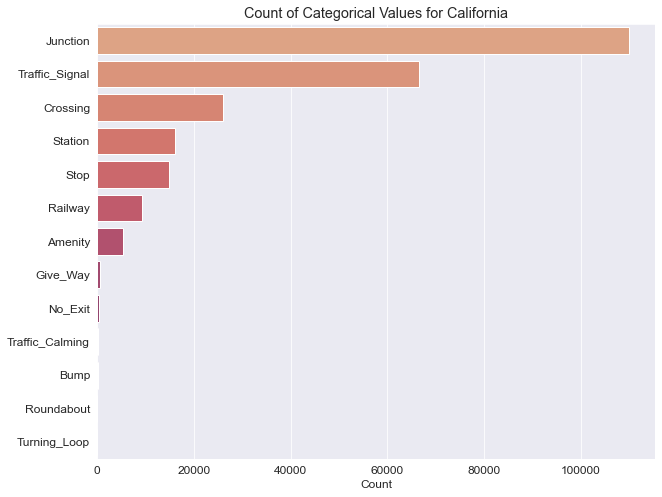

In [200]:
categorical = ca[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                 'Traffic_Signal', 'Turning_Loop']]

categorical = categorical[categorical == True].count().sort_values(ascending=False)


fig = plt.figure(figsize = (10,8))
sns.barplot(x = categorical.values, y = categorical.index, 
            palette= sns.color_palette("flare", n_colors=13, desat=1))


plt.title('Count of Categorical Values for California')
plt.xlabel('Count')
plt.show()

### Numerical Variables

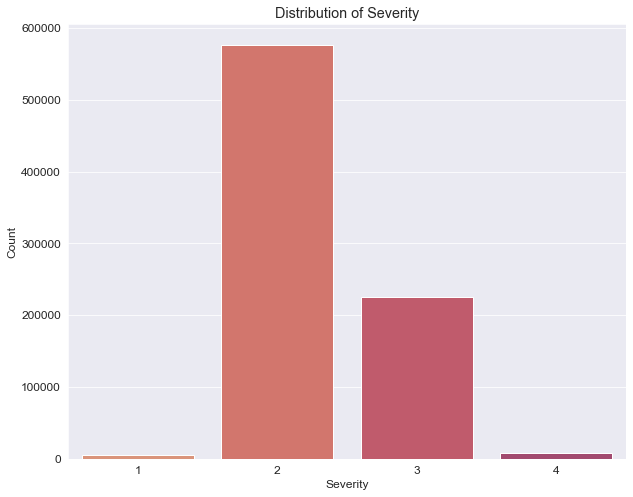

In [113]:
severity_counts = ca['Severity'].value_counts()

fig = plt.figure(figsize = (10,8))
sns.barplot(x = severity_counts.index, y = severity_counts.values)
plt.title('Distribution of Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Data Visualization - California State

### Cities with the Most Crashes / Population

> *Alpine, Sierra, and Mono county have the highest crash rate / population, but this is because their population is extremely small. The county with the most meaningful crash rate / population is Alameda county, which is near San Fransisco.*

In [157]:
# Since we don't have access to the population of counties, a new data frame is read in/merged.
ca_pop = pd.read_csv('california/ca_pop.csv')
ca_pop.columns = ['County', 'Population']
ca_pop['County'] = ca_pop['County'].apply(lambda x : x.replace('.', ''))
ca_pop['Population'] = ca_pop['Population'].apply(lambda x : int(x.replace(',', '')))

# Merging dataframes together
county_crashes = ca.groupby('County').count()[['Source']]
county_crashes = county_crashes.merge(ca_pop, how='inner', left_index=True, right_on='County')
county_crashes = county_crashes.set_index('County')
county_crashes.columns = ['Count', 'Population']

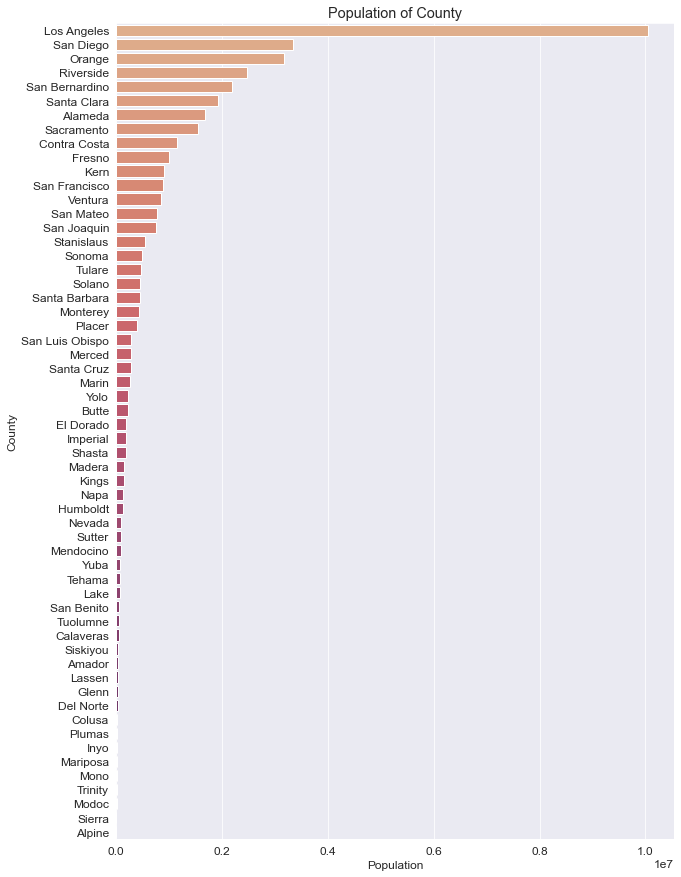

In [164]:
# Plotting counties by population
fig = plt.figure(figsize = (10,15))
highest_pop = ca_pop.sort_values(by='Population', ascending=False)

sns.barplot(x = 'Population', y = 'County', data = highest_pop, 
           palette= sns.color_palette("flare", n_colors=60, desat=1))
plt.title('Population of County')
plt.show()

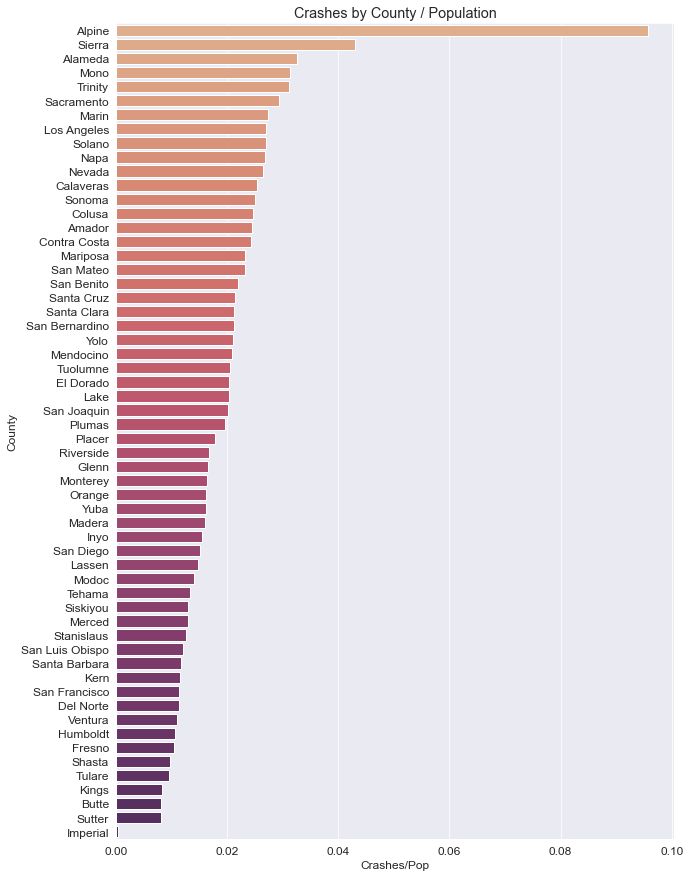

In [163]:
# Getting crashes / population
county_crashes['Crashes/Pop'] = county_crashes['Count'] / county_crashes['Population']
highest_crashes = county_crashes.sort_values(by='Crashes/Pop', ascending=False)


fig = plt.figure(figsize = (10,15))
highest_crashes = county_crashes.sort_values(by='Crashes/Pop', ascending=False)
sns.barplot(x = 'Crashes/Pop', y = highest_crashes.index, data = highest_crashes, 
           palette= sns.color_palette("flare", n_colors=60, desat=1))

plt.title('Crashes by County / Population')
fig.savefig('crashes_pop.png')
plt.show()

### All Crashes in California

> *We can clearly see that there are many more severity 2 crashes than any other. Also, many of the higher severity crashes seem to be in Los Angeles (lower-left cluster). We will be exploring the most dangerous roads later.*

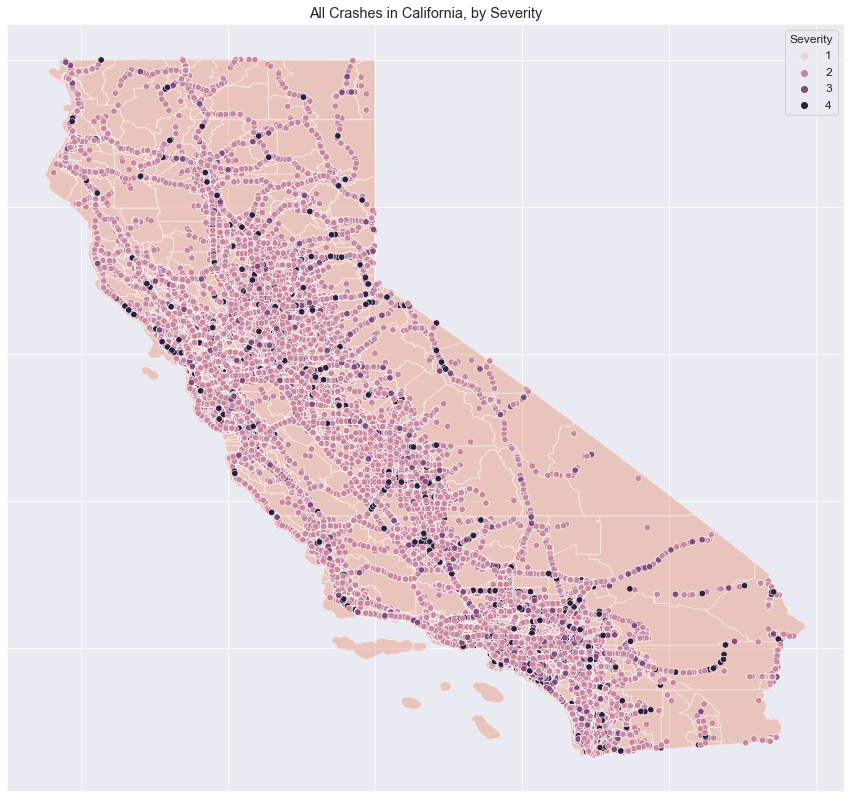

In [114]:
fig, ax = plt.subplots(figsize = (15,15))

ca_geo.plot(ax = ax, alpha = .4)
sns.scatterplot(x = 'x', y = 'y', data = ca, hue = 'Severity', s = 40)

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    labelleft=False,
    left=False)

plt.xlabel('')
plt.ylabel('')
plt.title('All Crashes in California, by Severity')
fig.savefig('all_crashes.png')

plt.show()

### Most Severe Crashes in California

> *This confirms the observation made previously: many of the most severe crashes are in the Los Angeles area. There are also many severe crashes in the Sacremento area*.

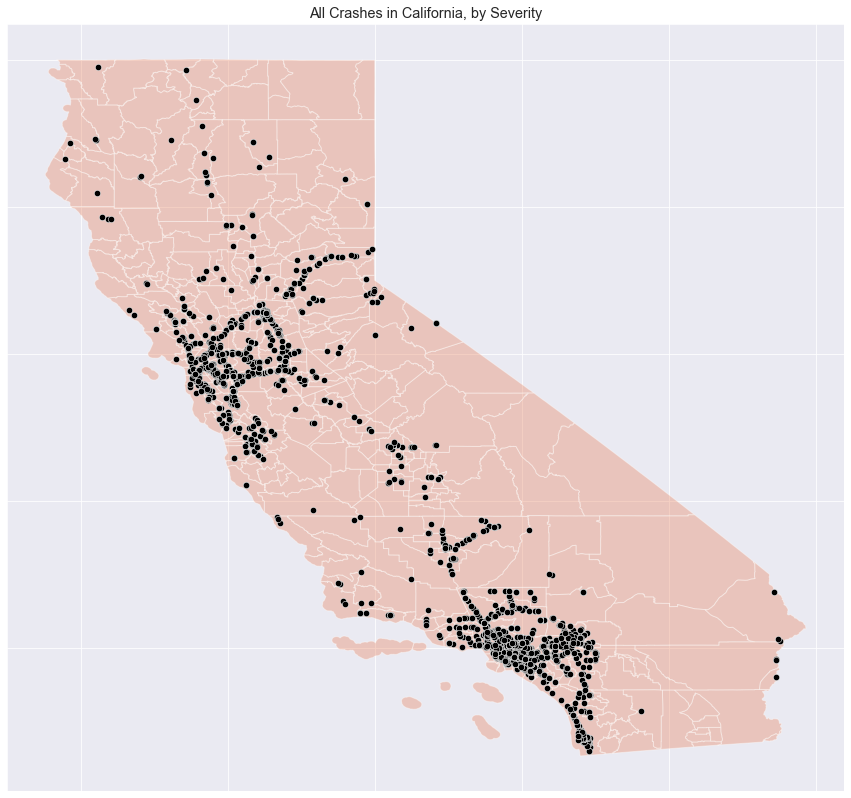

In [80]:
fig, ax = plt.subplots(figsize = (15,15))

ca_geo.plot(ax = ax, alpha = .4)
sns.scatterplot(x = 'x', y = 'y', data = ca[ca['Severity'] == 4], s = 40, color = 'black')

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    labelleft=False,
    left=False)

plt.xlabel('')
plt.ylabel('')
plt.title('All Crashes in California, by Severity')
fig.savefig('all_crashes.png')

plt.show()

### Most Dangerous Roads

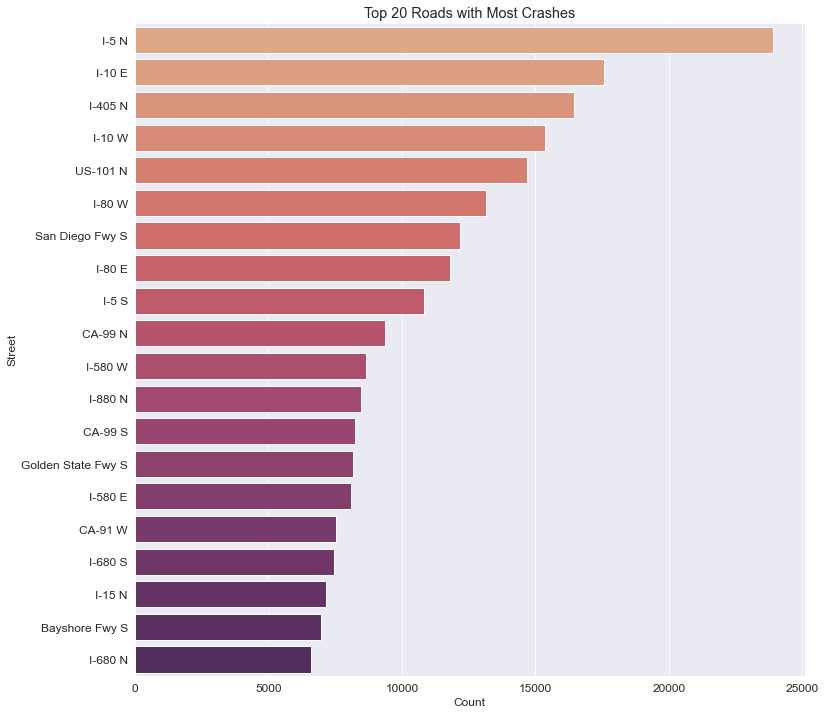

In [201]:
# Grouping by Street, and getting the number of crashes for each street
ca_worst_roads = df[df['State'] == 'CA'].groupby('Street', as_index=False).count().sort_values(by='ID', ascending=False).head(50)

fig = plt.figure(figsize=(12,12))
sns.barplot(x = 'ID', y = 'Street', data = ca_worst_roads.head(20), 
           palette= sns.color_palette("flare", n_colors=20, desat=1))

plt.title('Top 20 Roads with Most Crashes')
plt.xlabel('Count')
fig.savefig('ca_most.png')
plt.show()

### Crashes on I-5 N

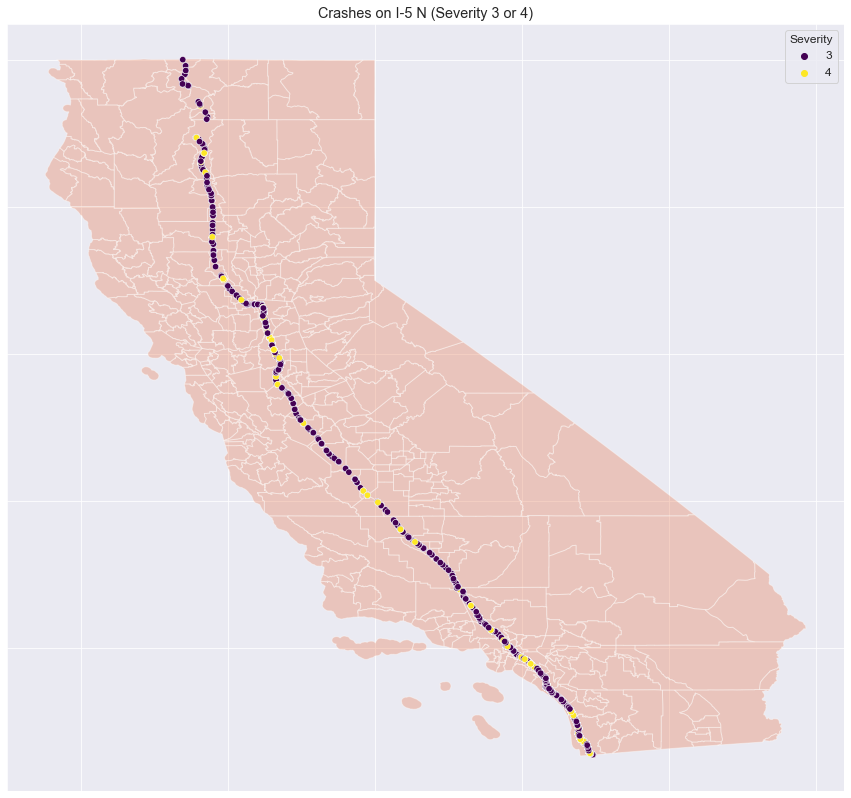

In [165]:
i_5_ca = ca[(ca['State'] == 'CA') & (ca['Street'] == 'I-5 N') & (ca['Severity'] >= 3)]

fig, ax = plt.subplots(figsize = (15,15))
sns.set_style('darkgrid')

ca_geo.plot(ax=ax, alpha=.4)
sns.scatterplot(x = 'x', y = 'y', data = i_5_ca, hue = 'Severity', s = 40, palette='viridis')


ax.set_title('Crashes on I-5 N (Severity 3 or 4)')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    labelleft=False,
    labelbottom=False,
    left=False)

fig.savefig('ca_i-5.png')

plt.show()

### Crashes by Weather

In [167]:
# Need to clean the weather column as there are variables that can be condensed into one category.
def clean_weather(row):
    if row == 'Fair':
        return 'Clear'
    if row == 'Mostly Cloudy' or row == 'Partly Cloudy' or row == 'Overcast' or row == 'Scattered Clouds' or row == 'Mostly Cloudy / Windy': 
        return 'Cloudy'
    if row == 'Light Rain' or row == 'Heavy Rain' or row == 'Light Drizzle' or row == 'Light Thunderstorms and Rain' or row == 'Thunderstorm' :
        return 'Rain'
    if row == 'Haze':
        return 'Fog'
    else:
        return row
ca['Weather_Condition'] = ca['Weather_Condition'].apply(lambda x : clean_weather(x))
weather = ca[(ca['Weather_Condition'] == 'Clear') |(ca['Weather_Condition'] == 'Cloudy') |
             (ca['Weather_Condition'] == 'Rain') | (ca['Weather_Condition'] == 'Fog')]


### Cloudy Weather

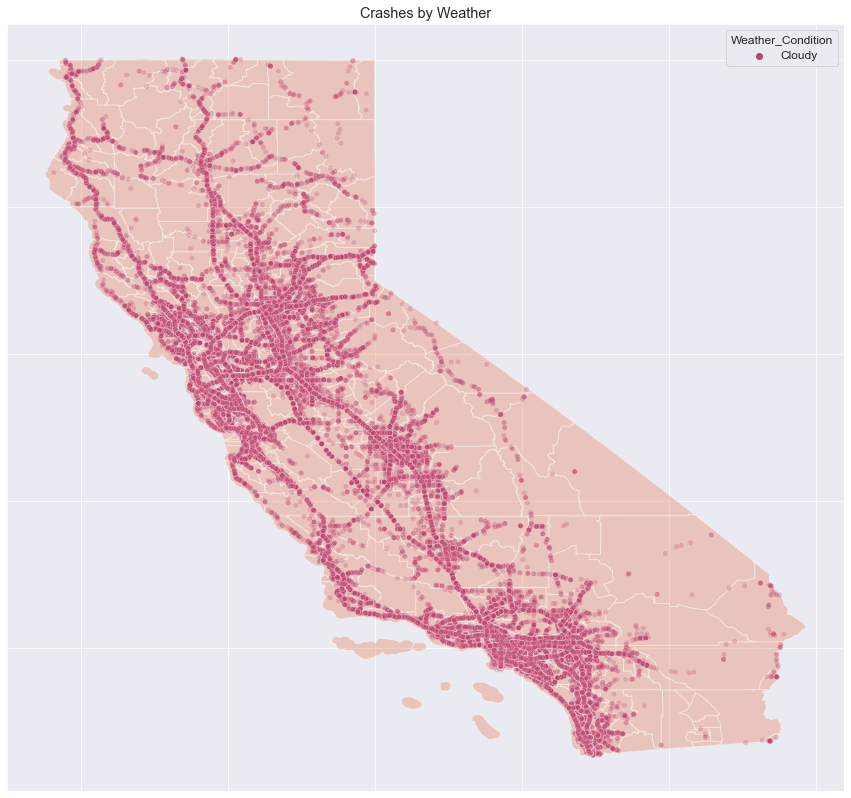

In [168]:
sns.set_palette(palette=None)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

ca_geo.plot(ax = ax, alpha = .4)
sns.scatterplot(x = 'x', y = 'y', data = weather[weather['Weather_Condition'] == 'Cloudy'], hue = 'Weather_Condition', s = 30, alpha = .25, palette = 'flare', ax=ax)


ax.set_title('Crashes by Weather')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    labelleft=False,
    left=False)
fig.savefig('crashes_by_weather_map.png')

plt.show()

### Rainy Weather

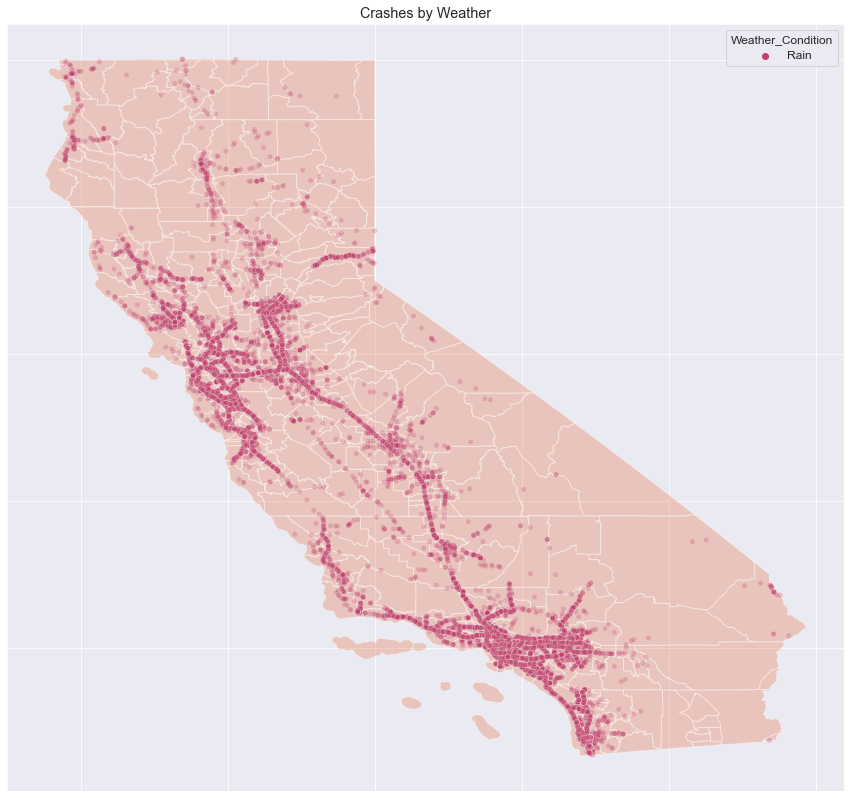

In [169]:
sns.set_palette(palette=None)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

ca_geo.plot(ax = ax, alpha = .4)
sns.scatterplot(x = 'x', y = 'y', data = weather[weather['Weather_Condition'] == 'Rain'], hue = 'Weather_Condition', s = 30, alpha = .25, palette = 'flare', ax=ax)


ax.set_title('Crashes by Weather')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    labelleft=False,
    left=False)
fig.savefig('crashes_by_weather_map.png')

plt.show()

### Severity by Weather

> *California weather is usually very sunny, so these results aren't too interesting. This would be more interesting if a state like Colorado was analzyed, which I plan to do.*

In [182]:
severity_1_by_Weather = []
severity_2_by_Weather = []
severity_3_by_Weather = []
severity_4_by_Weather = []
weather_severity = ca['Weather_Condition'].value_counts()[:7]

for i, val in enumerate(weather_severity):
    curr = weather_severity.index[i]
    severity_1_by_Weather.append(ca[(ca['Severity']==1)&(ca['Weather_Condition']==curr)].count()['Source'])
    severity_2_by_Weather.append(ca[(ca['Severity']==2)&(ca['Weather_Condition']==curr)].count()['Source'])
    severity_3_by_Weather.append(ca[(ca['Severity']==3)&(ca['Weather_Condition']==curr)].count()['Source'])
    severity_4_by_Weather.append(ca[(ca['Severity']==4)&(ca['Weather_Condition']==curr)].count()['Source'])

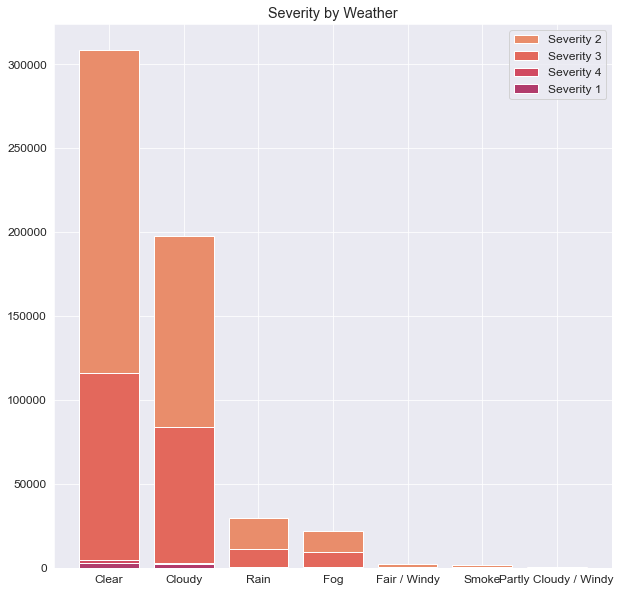

In [184]:
fig = plt.figure(figsize=(10, 10))
plt.bar(weather_severity.index, severity_2_by_Weather, label='Severity 2')
plt.bar(weather_severity.index, severity_3_by_Weather, label='Severity 3')
plt.bar(weather_severity.index, severity_4_by_Weather, label='Severity 4')
plt.bar(weather_severity.index, severity_1_by_Weather, label='Severity 1')
plt.legend()
fig.savefig('weatherseverity.png')

plt.title('Severity by Weather')
plt.show()

### Most Common Times of Crashes

> *As expected, the most common times are 7 AM and 4 PM, which is rush hour. This also explains the terrible traffic California suffers from*.

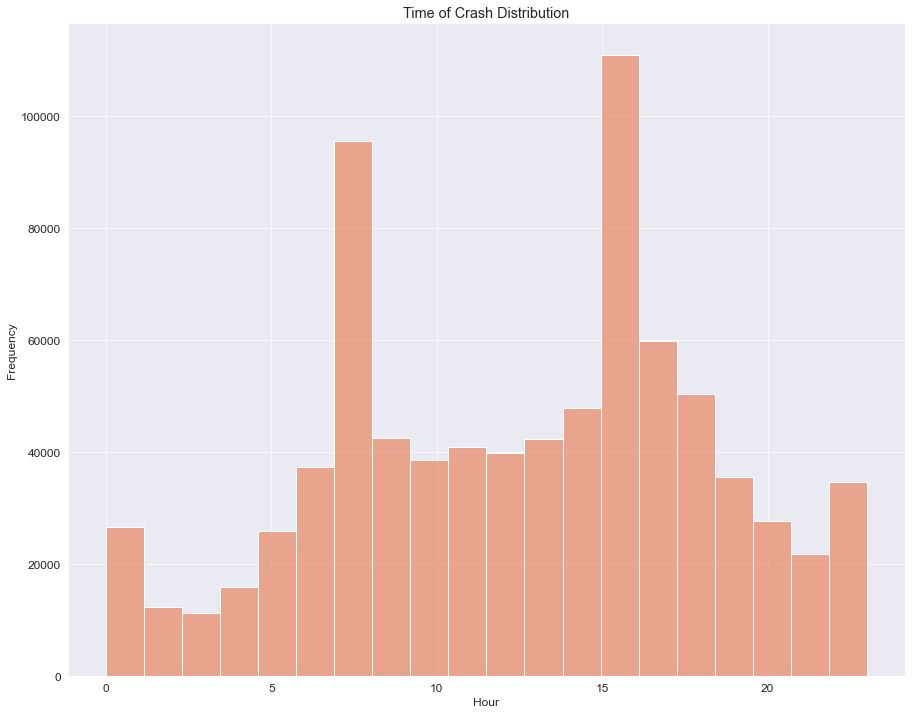

In [173]:
ca['hour_min'] = ca['Start_Time'].apply(lambda x : x[10:16])
ca['hour'] = ca['hour_min'].apply(lambda x : int(x.split(':')[0]))

fig = plt.figure(figsize = (15,12))
sns.histplot(x = 'hour', data = ca, kde=False, bins = 20)
fig.savefig('common_times.png')

plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.title('Time of Crash Distribution')
plt.show()

### Frequency of Crashes by Day

> *There is a noticeable peak of crashes on April 6. I could not find an explanation for why the crashes are so high on this date after some research. There also seems to be a drop in crashes during July/August.*

In [174]:
# To get the month and day of crash, we need to split the Start_Time variable and take the 
# relevant parts
def get_month_day(month, day):
    return "{}-{}".format(month, day)

ca['Date'] = ca['Start_Time'].apply(lambda x : x.split(' ')[0])
ca['Month'] = ca['Date'].apply(lambda x : x.split('-')[1])
ca['Day'] = ca['Date'].apply(lambda x : x.split('-')[2])
ca['Year'] = ca['Date'].apply(lambda x : x.split('-')[0])
ca['Month-Day']= ca.apply(lambda x : get_month_day(x['Month'], x['Day']), axis=1)

In [175]:
#Grouping on Month and Day
crashes_daily = ca.groupby('Month-Day').count()

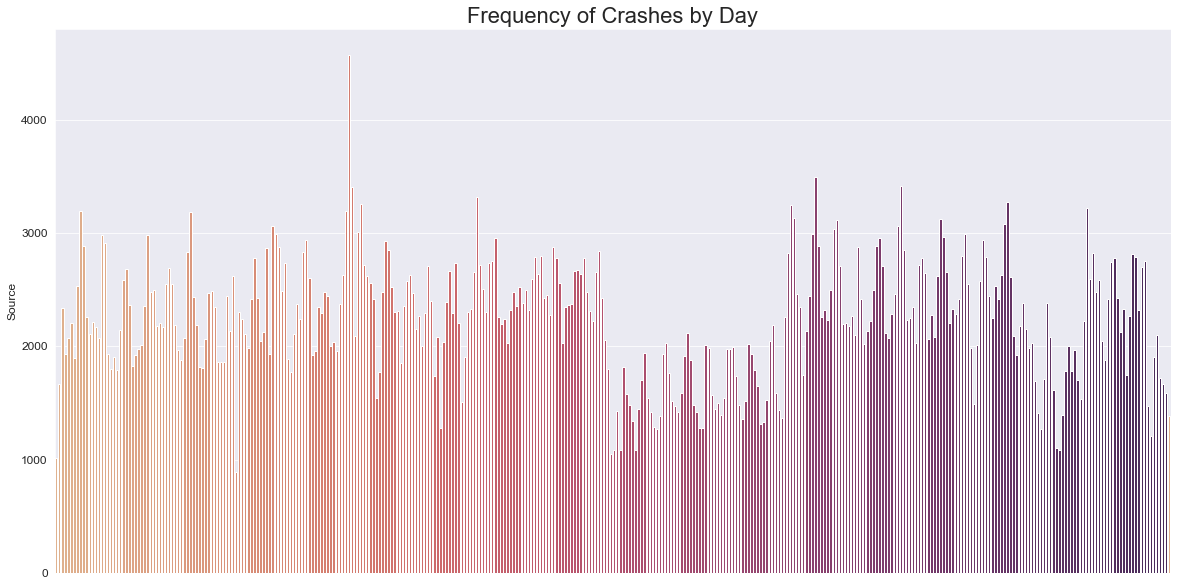

In [199]:
fig = plt.figure(figsize = (20,10))
sns.barplot(x = crashes_daily.index, y = 'Source', data = crashes_daily,
           palette= sns.color_palette("flare", n_colors=365, desat=1))


plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)


plt.xlabel('')
plt.title('Frequency of Crashes by Day', fontsize = 22)
fig.savefig('frequency.png')
plt.show()

### Days with the Most Crashes

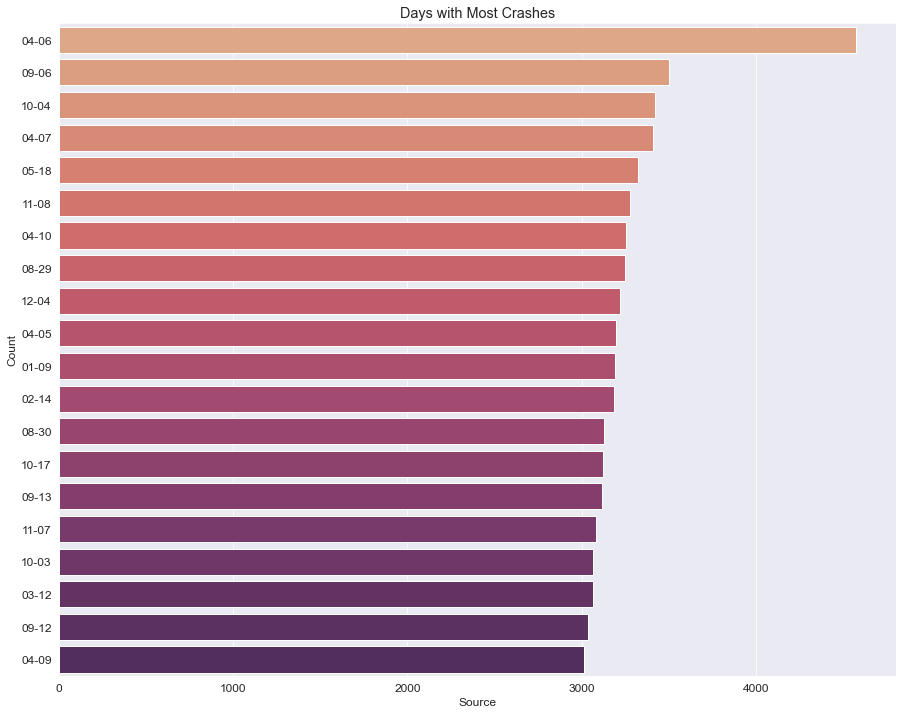

In [198]:
sorted_crashes = crashes_daily.sort_values(by='Source', ascending=False).head(20)
fig = plt.figure(figsize = (15,12))
sns.barplot(x = 'Source', y = sorted_crashes.index, data = sorted_crashes, 
           palette= sns.color_palette("flare", n_colors=20, desat=1))

plt.title('Days with Most Crashes')
plt.ylabel('Count')
plt.show()

### Seasons with Most Crashes

In [193]:
def get_seasons(month):
    if month == '01' or month == '02' or month == '11' or month == '12':
        return 'Winter'
    if month == '03' or month == '04' or month == '05':
        return 'Spring'
    if month == '06' or month == '07' or month == '08':
        return 'Summer'
    else:
        return 'Fall'

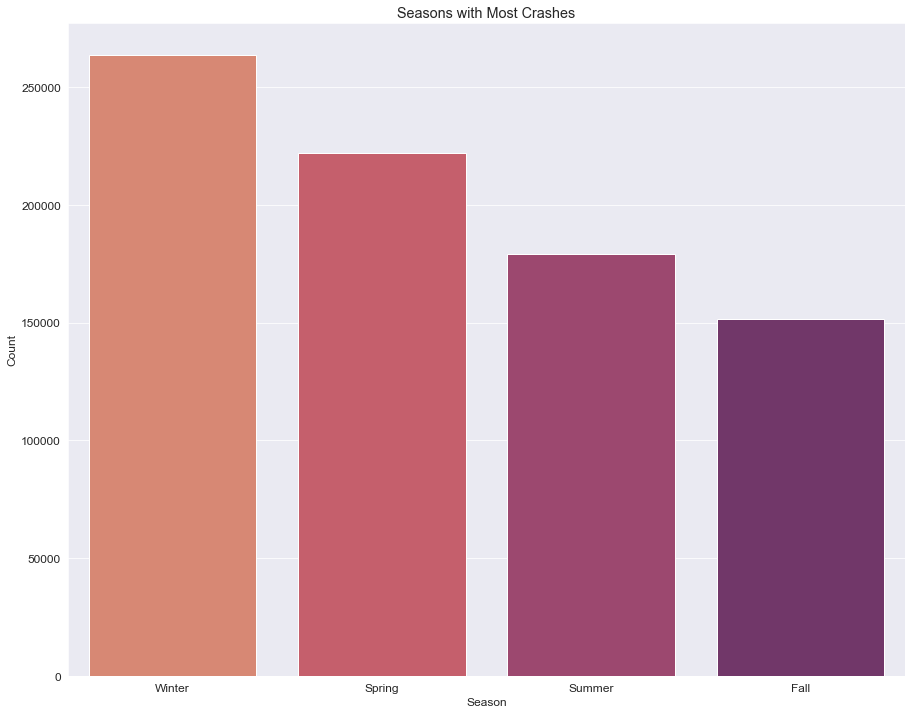

In [197]:
ca['seasons'] = ca['Month'].apply(lambda x : get_seasons(x))
season_count = ca.groupby('seasons').count()

sorted_seasons = season_count.sort_values(by='Source', ascending=False)

fig = plt.figure(figsize = (15,12))
sns.barplot(x = sorted_seasons.index, y = 'Source', data = sorted_seasons, 
           palette= sns.color_palette("flare", n_colors=4, desat=1))

plt.title('Seasons with Most Crashes')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()